In [8]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt


In [9]:
# Memuat dataset
df = pd.read_csv('diabete.csv')

In [10]:
# Mengubah nilai-nilai nol menjadi nilai rata-rata pada kolom tertentu
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    df[col] = df[col].replace(0, df[col].mean())

# Membagi dataset menjadi data latih dan data uji
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Membangun model decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7207792207792207


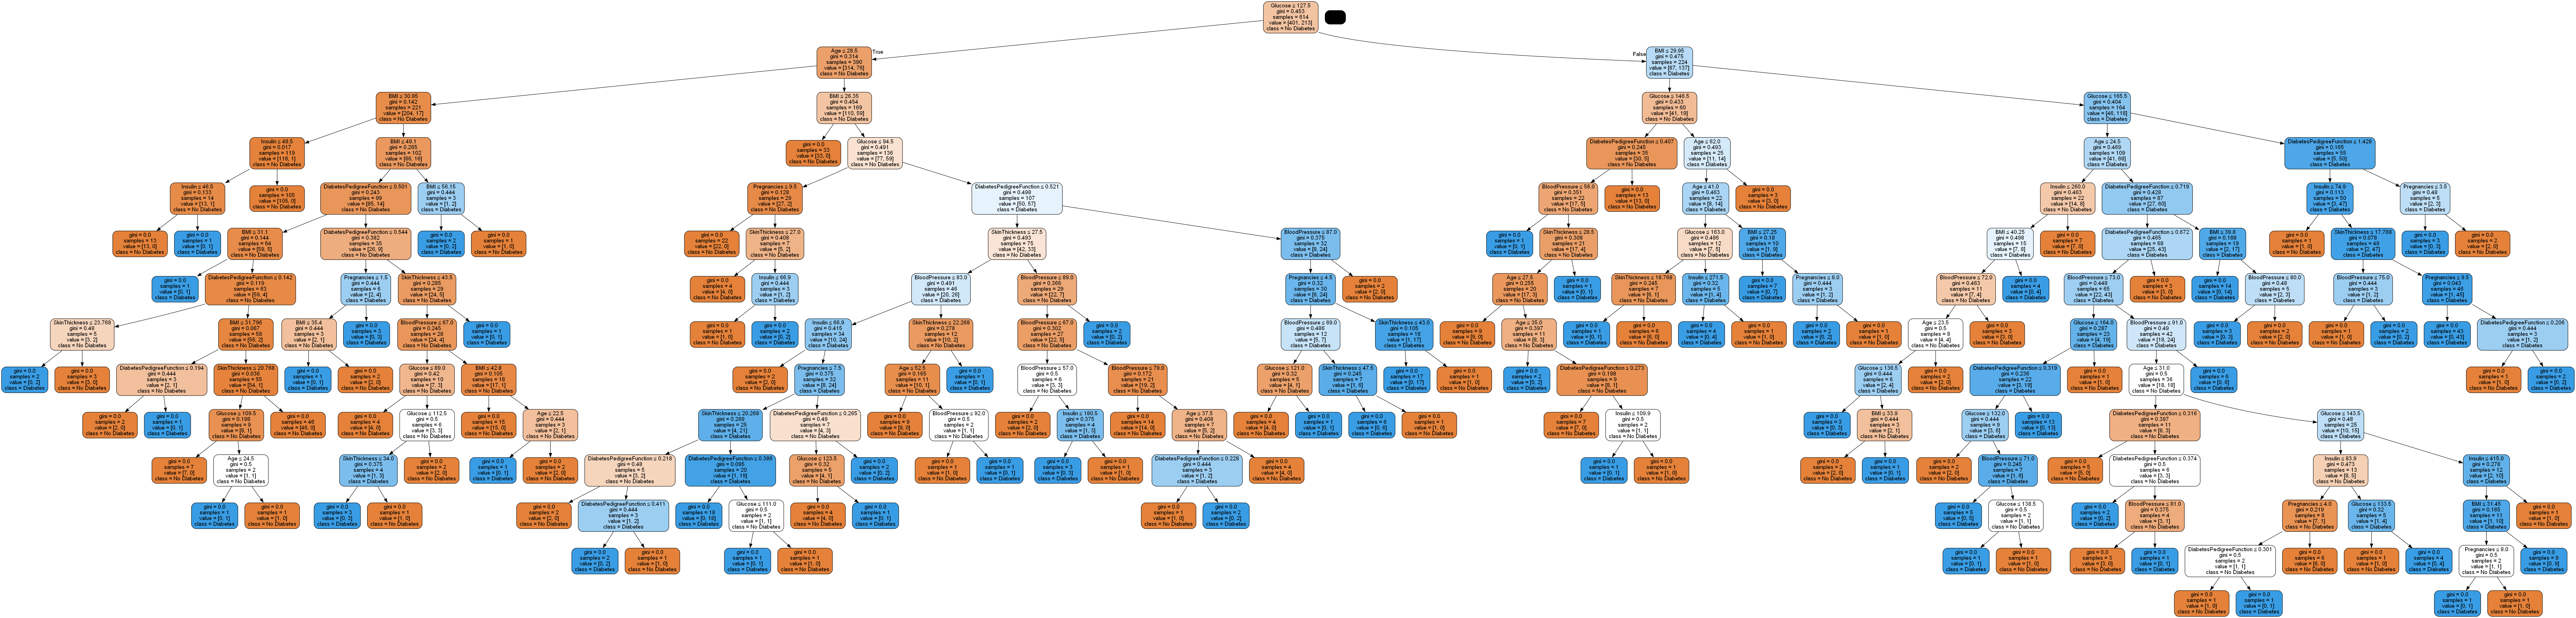

In [7]:
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Membuat file DOT untuk menggambarkan decision tree
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Diabetes', 'Diabetes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Menggambar decision tree dengan Graphviz
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())